In [1]:
import pandas as pd
import numpy as np

In [2]:
dt=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
dt.shape

(6362620, 11)

In [5]:
dt.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
dt.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
dt.isnull().sum()
print(dt.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
df=dt[['type']]

In [9]:
df.value_counts()

type    
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
dtype: int64

In [10]:
dt['type']=dt['type'].replace({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
x=dt[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

In [13]:
y=dt[['isFraud']]

In [14]:
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_train.shape

(4453834, 6)

In [17]:
y_train.shape

(4453834, 1)

In [18]:
y_test.shape

(1908786, 1)

In [19]:
x_test.shape

(1908786, 6)

In [20]:
md=DecisionTreeClassifier()
md.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
sc=md.score(x_test,y_test)

In [22]:
sc

0.9995887438403257

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier()
model2=rf.fit(x_train,np.ravel(y_train))

In [25]:
sc2=model2.score(x_test,y_test)
sc2

0.9996002694906606

In [26]:
pred=model2.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1906277,      74],
       [    689,    1746]])

In [28]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, pred)
ac

0.9996002694906606

In [29]:
from sklearn.metrics import classification_report

In [30]:
sc4=classification_report(y_test, pred)

In [31]:
print(sc4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.72      0.82      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.86      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, pred)


In [35]:
import matplotlib.pyplot as plt

import seaborn as sns


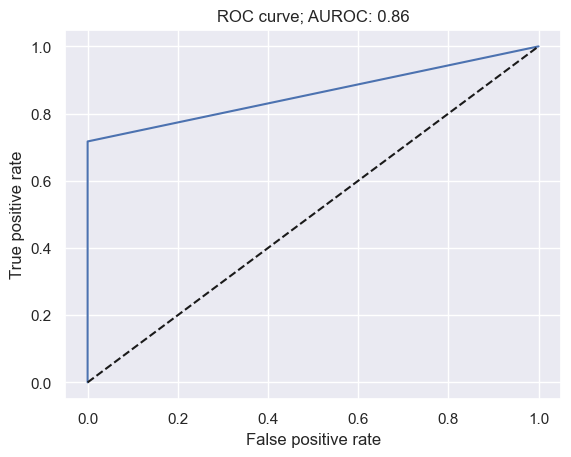

In [37]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, pred), 2)

plt.title(f'ROC curve; AUROC: {AUROC}');

plt.show()